In [1]:
pip install numpy

In [ ]:
pip install scipy

In [ ]:
pip install matplotlib

In [ ]:
import numpy as np

# X = (hours sleeping, hours studying)
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
# y = Score on test
y = np.array(([75], [82], [93]), dtype=float)

# normalize
X= X/np.amax(X,axis=0)
y = y/100

In [2]:
class NeuralNetwork(object):
    def __init__(self):
        # Hyperparameters
        self.inputLayerSize = 2
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #forward propagation
        self.Z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.Z2)
        self.Z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.Z3)
        return yHat
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

In [3]:
NN = NeuralNetwork()
yHat = NN.forward(X)
y

array([[0.75],
       [0.82],
       [0.93]])

In [4]:
yHat

array([[0.59579482],
       [0.49859315],
       [0.50117962]])

In [5]:
y-yHat

array([[0.15420518],
       [0.32140685],
       [0.42882038]])

In [6]:
import time
weightsToTry = np.linspace(-10,10,1000)
costs = np.zeros(1000)

startTime = time.time()

for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)

endTime = time.time()

timeElapsed = endTime-startTime
timeElapsed


0.017939090728759766

In [7]:
class NeuralNetwork(object):
    def __init__(self):
        # Hyperparameters
        self.inputLayerSize = 2
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #forward propagation
        self.Z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.Z2)
        self.Z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.Z3)
        return yHat
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

    def costFunction(self, X, y):
        #cost for given X, y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J

    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)

    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.Z3))
        dJdW2 = np.dot(self.a2.T,delta3)

        delta2 = np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.Z3)
        dJdW1 = np.dot(X.T,delta2)

        return dJdW1, dJdW2     

In [8]:
NN = NeuralNetwork()
cost1 = NN.costFunction(X,y)
dJdW1, dJdW2 =  NN.costFunctionPrime(X,y)

In [9]:
dJdW1

array([[-0.02142153, -0.01294602,  0.01491764],
       [-0.01252207, -0.00756767,  0.00872018]])

In [10]:
dJdW2

array([[-0.13380495],
       [-0.04839183],
       [-0.1121544 ]])

In [11]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

print(cost1, cost2)

[0.07924793] [0.22246397]


In [12]:
scalar = 3
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X,y)

print(cost2, cost3)

[0.22246397] [0.07924793]


In [13]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
        
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

        #Return the value we changed to zero:
        perturb[p] = 0
        
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [15]:
NN = Neural_Network()
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients
#norm(grad-numgrad)/norm(grad+numgrad)

In [ ]:
#from videoSupport import *

In [16]:
%pylab inline
from scipy import optimize

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res
    

In [ ]:
NN = Neural_Network()
T = trainer(NN)
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 49
         Function evaluations: 51
         Gradient evaluations: 51


Text(0, 0.5, 'Cost')

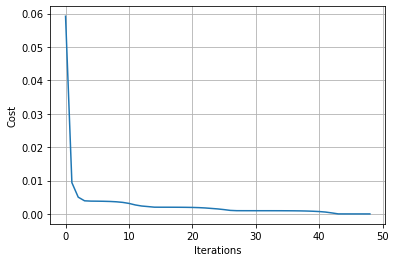

In [ ]:
plot(T.J)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [ ]:
NN.costFunctionPrime(X,y)

(array([[-4.85783507e-08, -1.00166885e-08,  1.85144606e-09],
        [ 1.04478068e-07, -2.88604247e-07,  3.91650240e-08]]),
 array([[4.24506031e-08],
        [8.65474487e-09],
        [9.24075643e-09]]))

In [ ]:
NN.forward(X)

array([[0.74999816],
       [0.82000247],
       [0.92999814]])

In [ ]:
y

array([[0.75],
       [0.82],
       [0.93]])

In [ ]:
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [ ]:
allOutputs = NN.forward(allInputs)

Text(0, 0.5, 'Hours Study')

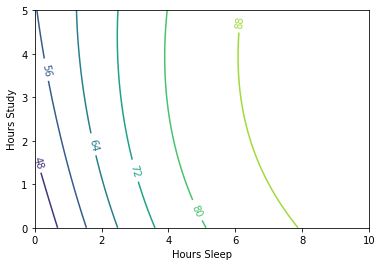

In [ ]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

C:\Users\mange\AppData\Local\Temp\ipykernel_8960\1681459530.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0, 'Test Score')

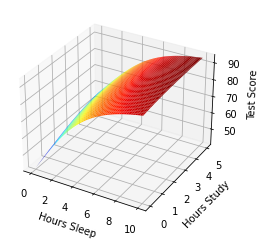

In [ ]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')